## TALENT TRACK: Mapping Employee Performance and Potential

### Objective
The objective of this project is to analyze employee performance data and identify factors that influence performance and talent management within the organization. By leveraging data analytics techniques, we aim to gain insights that can inform talent management strategies, improve employee satisfaction, and enhance overall organizational performance.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
df=pd.read_csv("E:\python projects\HR-Employee-Attrition.csv")

In [61]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [62]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


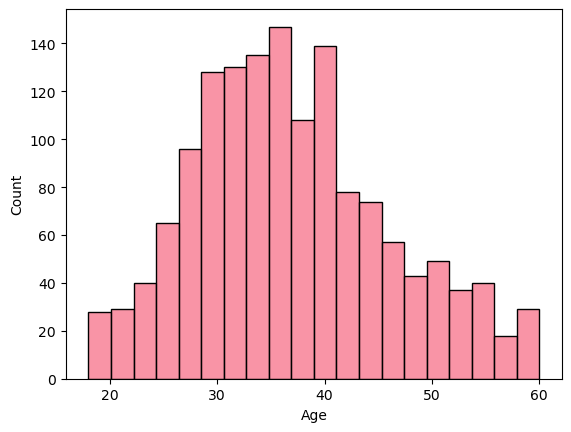

In [63]:
# Visualize distributions of variables
sns.set_palette('husl')
sns.histplot(df['Age'], bins=20)
plt.show()

### Data Cleaning and Preprocessing

In [64]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [65]:
# Drop duplicates
df.drop_duplicates(inplace=True)

### Feature engineering

In [100]:
df['Attrition_bin'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [101]:
# Tenure feature
df['Tenure'] = df['YearsAtCompany'] + df['YearsInCurrentRole']

# Satisfaction score
df['SatisfactionScore'] = (df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']) / 3

In [102]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Department', 'EducationField', 'JobRole'], drop_first=True)

In [103]:
bins = [18, 30, 45, 60]
labels = ['Young', 'Mid-Age', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [104]:
# Calculate experience ratio
df['ExperienceRatio'] = df['TotalWorkingYears'] / df['Age']

In [105]:
# Work-life balance index
df['WorkLifeBalanceIndex'] = (df['WorkLifeBalance'] + df['EnvironmentSatisfaction'] + df['JobSatisfaction']) / 3

In [106]:
# Promotion potential
df['PromotionPotential'] = df['YearsSinceLastPromotion'] / df['YearsAtCompany']

In [107]:
# Interaction between education and job level
df['EducationJobInteraction'] = df['Education'] * df['JobLevel']

In [108]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,Tenure,SatisfactionScore,AgeGroup,ExperienceRatio,WorkLifeBalanceIndex,PromotionPotential,EducationJobInteraction,Attrition​_bin,Attrition_bin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,5,10,2.333333,Mid-Age,0.195122,2.333333,0.000000,4,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,7,17,3.000000,Senior,0.204082,2.666667,0.100000,2,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,3.000000,Mid-Age,0.189189,3.333333,NaN,2,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,15,3.333333,Mid-Age,0.242424,3.333333,0.375000,4,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,4,2.333333,Young,0.222222,2.000000,1.000000,1,0,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,6,14,3.666667,Mid-Age,0.250000,3.333333,0.428571,2,0,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,0,1,1.666667,Senior,0.203390,2.000000,0.000000,3,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,0,1,3.000000,Mid-Age,0.033333,3.333333,0.000000,1,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,8,16,3.000000,Mid-Age,0.263158,3.333333,0.111111,9,0,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,7,14,2.666667,Mid-Age,0.472222,2.666667,1.000000,6,0,0


In [116]:
df = df.drop(df.columns[-2],axis=1)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Tenure,SatisfactionScore,AgeGroup,ExperienceRatio,WorkLifeBalanceIndex,Attrition_bin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,6,4,0,5,10,2.333333,Mid-Age,0.195122,2.333333,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,7,1,7,17,3.000000,Senior,0.204082,2.666667,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,0,3.000000,Mid-Age,0.189189,3.333333,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,7,3,0,15,3.333333,Mid-Age,0.242424,3.333333,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,2,4,2.333333,Young,0.222222,2.000000,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,7,7,3,6,14,3.666667,Mid-Age,0.250000,3.333333,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,0,0,0,1,1.666667,Senior,0.203390,2.000000,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,1,0,0,0,1,3.000000,Mid-Age,0.033333,3.333333,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,9,7,1,8,16,3.000000,Mid-Age,0.263158,3.333333,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,7,7,7,7,14,2.666667,Mid-Age,0.472222,2.666667,0


### Data analysis and modeling

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [120]:
# Split data into features (X) and target variable (y)
df['Attrition_bin'].dropna()
X = df.drop(columns=['Attrition_bin'])
X = df.drop(columns=['Attrition'])
y = df['Attrition_bin']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [130]:
# Separate numerical and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=100000))])

# Train the model
model.fit(X_train, y_train)

C:\Users\Priyadharshini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Percent...
       'SatisfactionScore', 'ExperienceRatio', 'WorkLifeBalanceIndex',
       'Attrition_bin'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=100000))])

In [131]:
# Evaluate model performance
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

### Predicting

In [132]:
# Predict on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [133]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


### Report

In [134]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [136]:
from sklearn.metrics import confusion_matrix, classification_report

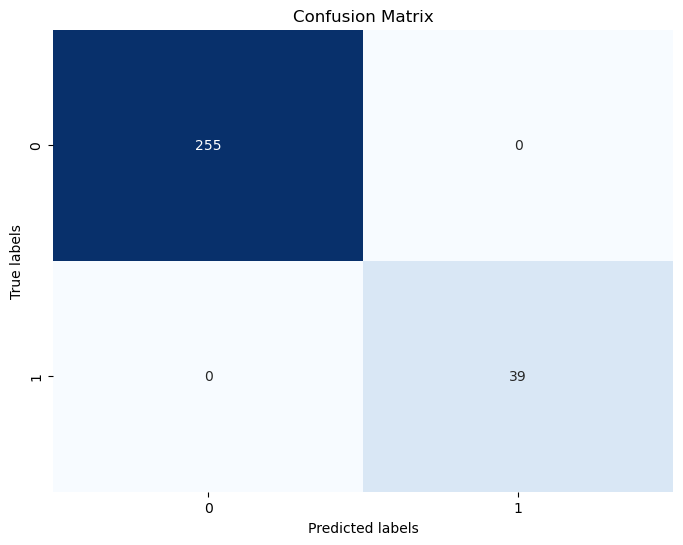


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [137]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

### Visualization

#### Attrition Distribution: We'll use a pie chart to show the distribution of the target variable "Attrition".

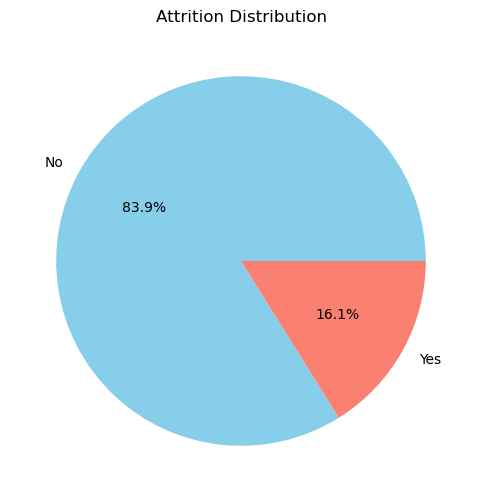

In [139]:
# Calculate the counts of each category in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plotting the distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Attrition Distribution')
plt.show()

#### Numeric Features Distribution: We'll create histograms for numeric features like age, monthly income, and years at the company to visualize their distributions and identify outliers.

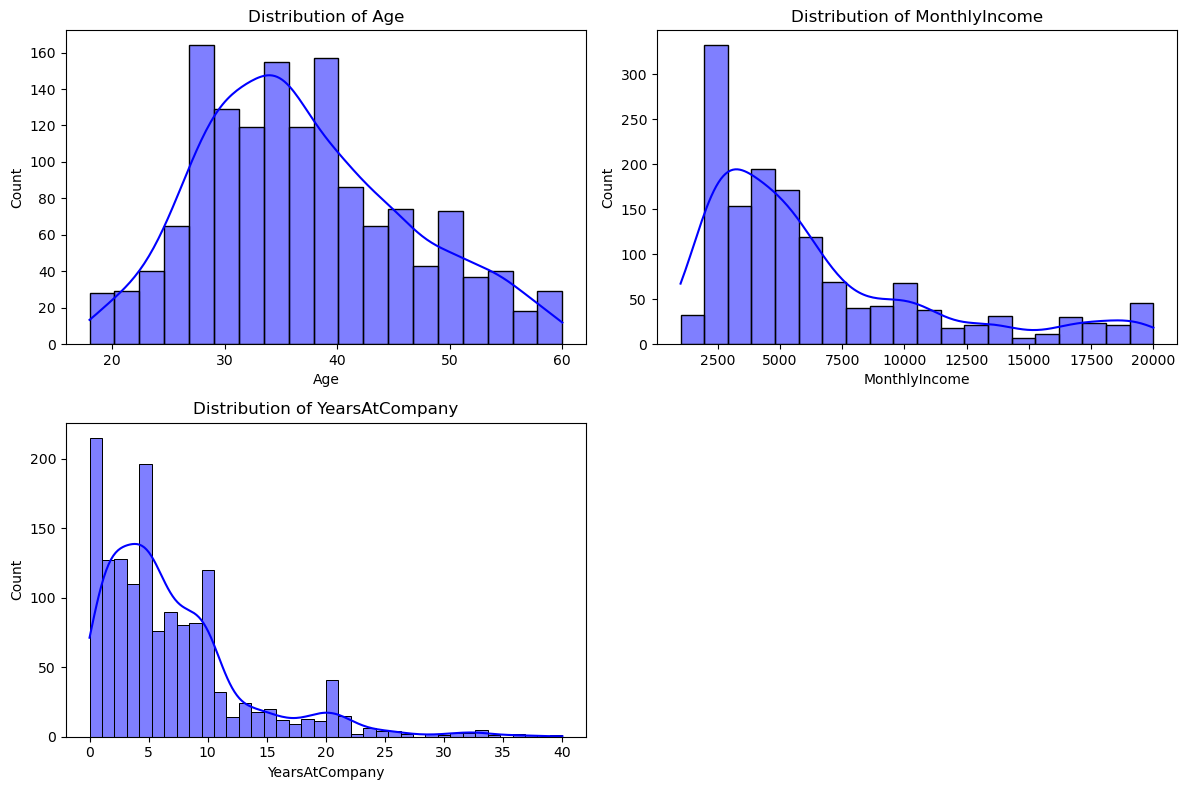

In [149]:
# Numeric features to plot
numeric_features = ['Age', 'MonthlyIncome', 'YearsAtCompany']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='b')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#### Correlation Heatmap: We'll create a heatmap to visualize the correlation between numeric features and the target variable "Attrition".

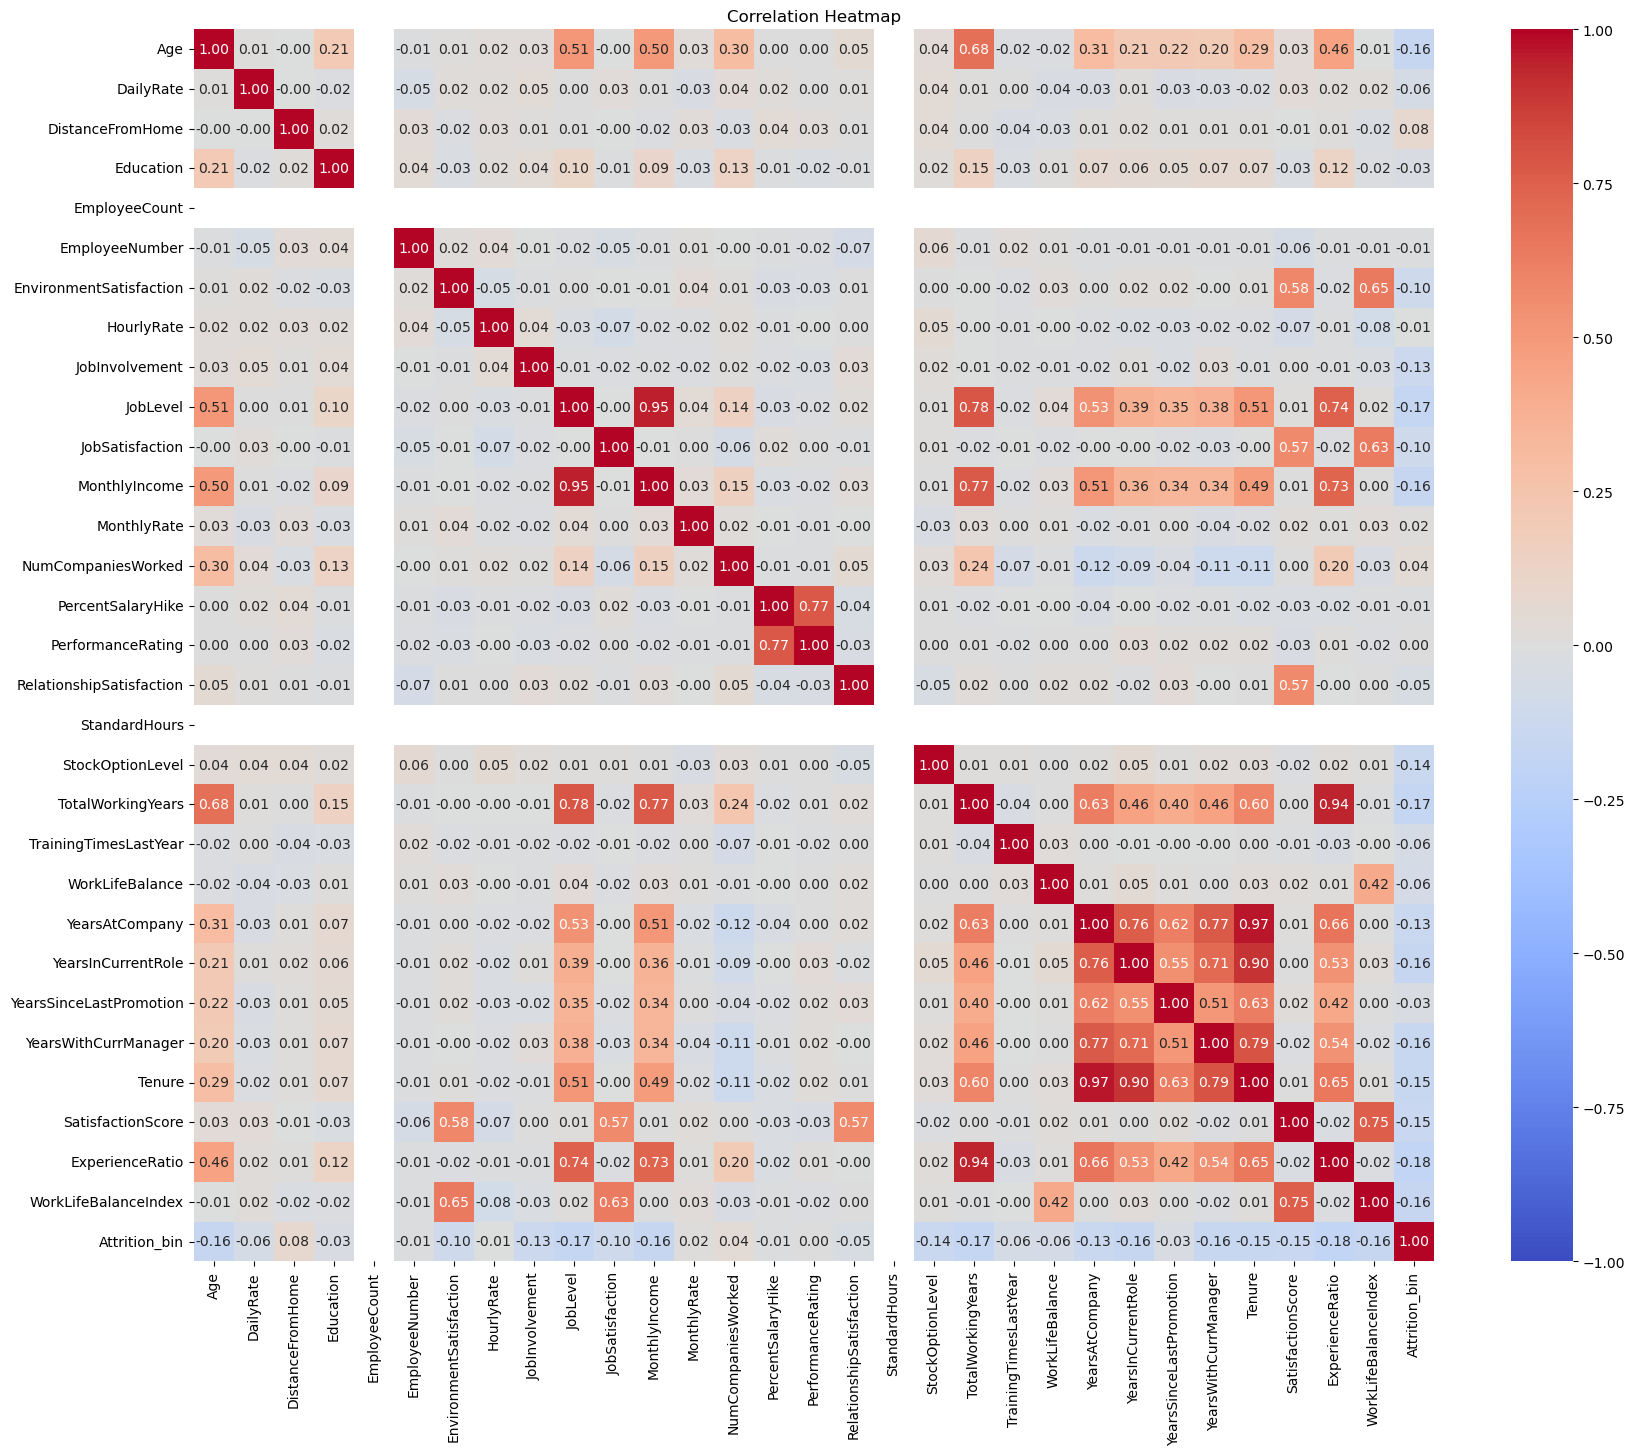

In [150]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### ROC Curve

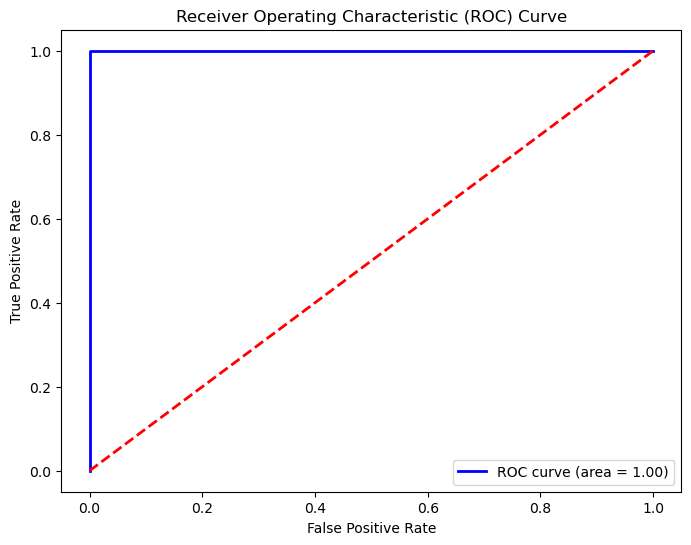

In [156]:
# Predict probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Employee Tenure vs. Attrition

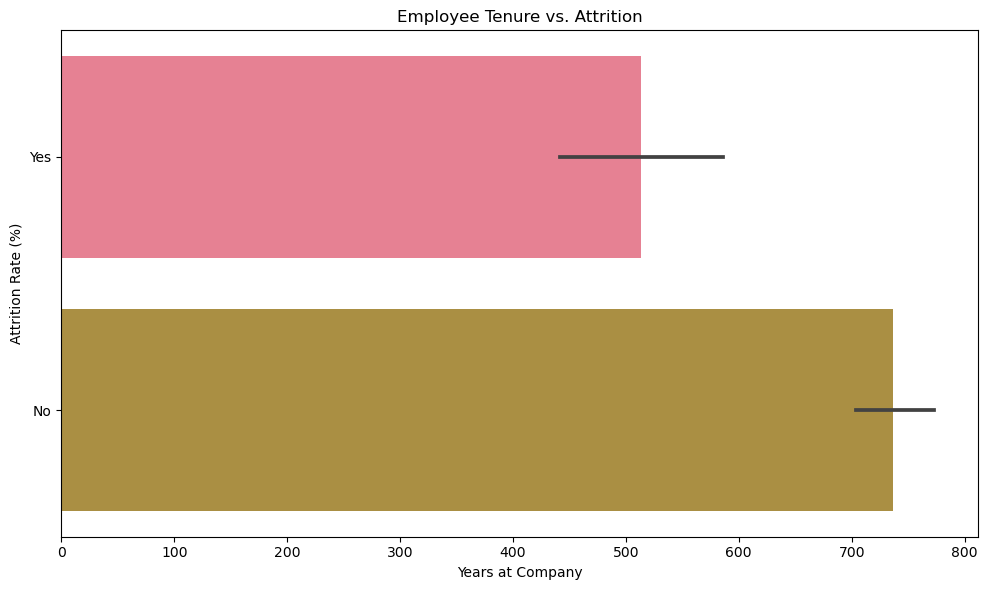

In [167]:
plt.figure(figsize=(10, 6))
sns.barplot(x='YearsAtCompany', y='Attrition', data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate (%)')
plt.title('Employee Tenure vs. Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Attrition rate for each department

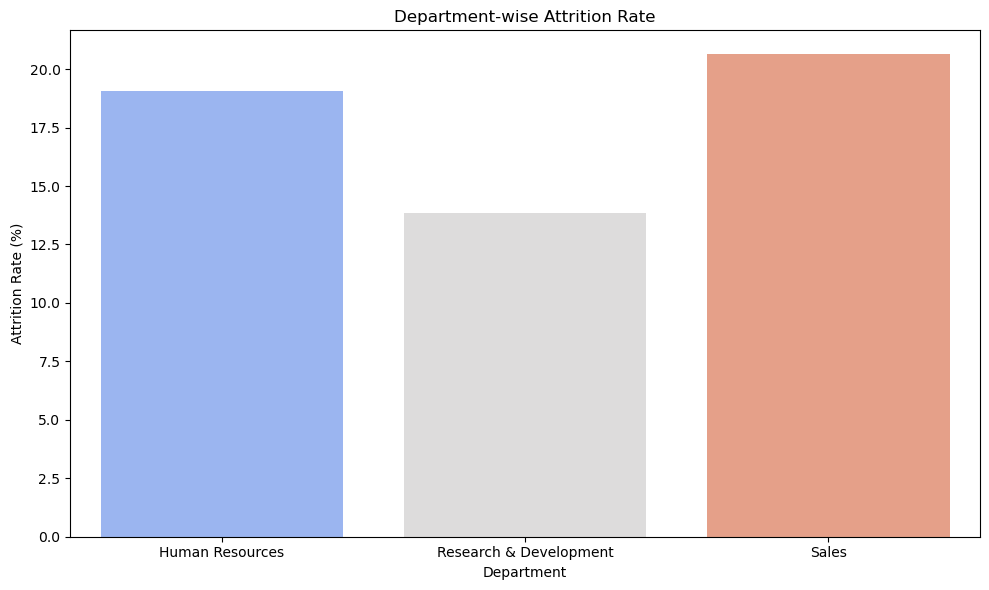

In [163]:
# Calculate attrition rate for each department
attrition_rate_by_department = df.groupby('Department')['Attrition_bin'].mean() * 100

# Ploting department-wise attrition using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_department.index, y=attrition_rate_by_department.values, palette='coolwarm')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.title('Department-wise Attrition Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Employee Satisfaction vs. Attrition

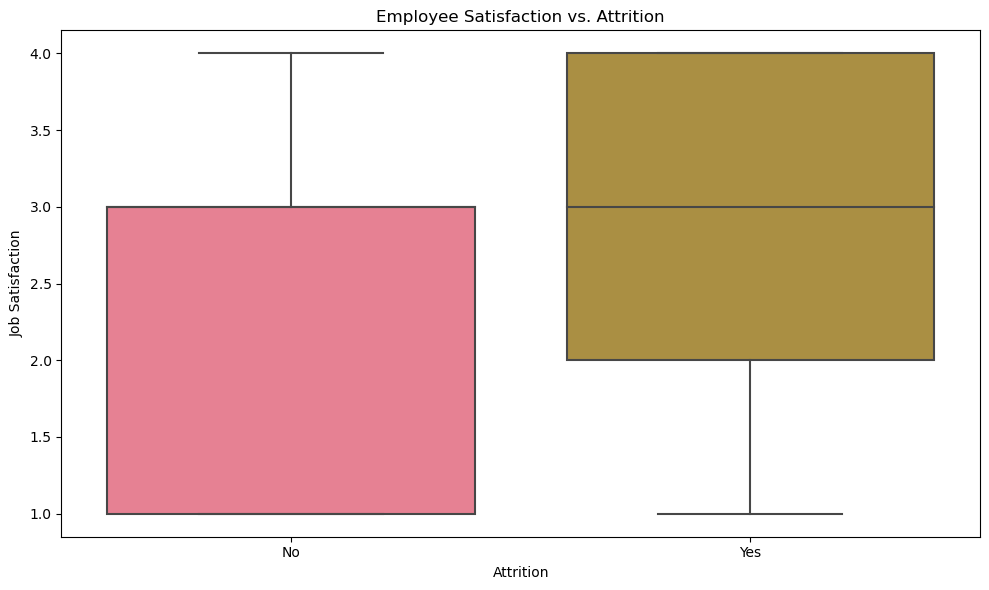

In [173]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.title('Employee Satisfaction vs. Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()